In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import interpolate, integrate

In [2]:
a = np.single(10**-3)
aa = np.double(10**-3)
print(np.exp(a))
print(np.exp(aa))
print(np.exp(a)-np.exp(aa))

1.0010005
1.0010005001667084
2.3400491322433936e-08


# 1b)

In [3]:
def custom_exp(x):
    return np.exp(0.01*x)
def fancy_derivative(f,x,d,precision='s'):
    if precision=='s':
        c1=np.single(2/3); c2=np.single(1/12)
    elif precision=='d':
        c1=np.double(2/3); c2=np.double(1/12)
    return ( c1*(f(x+d)-f(x-d)) + c2*(f(x-2*d)-f(x+2*d)) ) / d


<IPython.core.display.Javascript object>


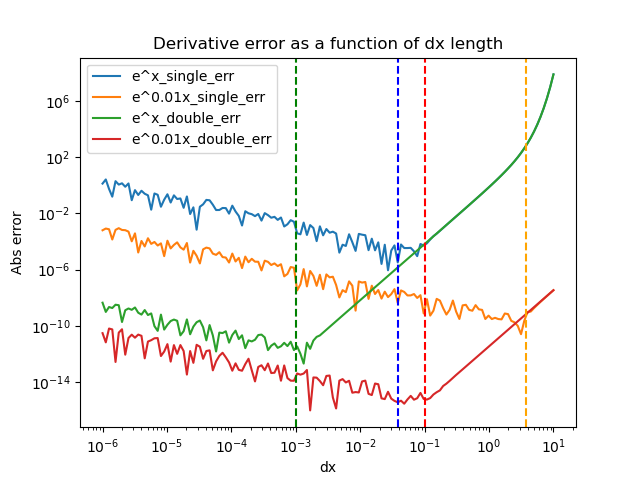

Dashed lines represent the estimated optimal dx values


In [4]:
expvals=np.linspace(-6,1,140, endpoint=True)
x0=3

#tru_s1 = np.exp(np.single(x0))
#tru_s2 = 0.01*custom_exp(np.single(x0))
#tru_d1 = np.exp(np.double(x0))
#tru_d2 = 0.01*custom_exp(np.double(x0))
tru_1 = np.exp(np.longdouble(x0))
tru_2 = 0.01 * custom_exp( np.longdouble(x0))

deriv_s1=np.zeros(len(expvals)); deriv_s2=np.zeros(len(expvals))
deriv_d1=np.zeros(len(expvals)); deriv_d2=np.zeros(len(expvals))  

for i,myexp in enumerate(expvals):
    dx_s = np.single(10**myexp)
    dx_d = np.double(10**myexp)
    deriv_s1[i] = fancy_derivative( np.exp , np.single(x0) , dx_s )
    deriv_s2[i] = fancy_derivative( custom_exp , np.single(x0) , dx_s )
    deriv_d1[i] = fancy_derivative( np.exp , np.double(x0) , dx_d , precision='d')
    deriv_d2[i] = fancy_derivative( custom_exp , np.double(x0) , dx_d , precision='d')

plt.figure(); plt.title('Derivative error as a function of dx length'); plt.xlabel('dx'); plt.ylabel('Abs error')
plt.plot( 10**expvals , np.abs(deriv_s1-tru_1) , label='e^x_single_err')
plt.plot( 10**expvals , np.abs(deriv_s2-tru_2) , label='e^0.01x_single_err')
plt.plot( 10**expvals , np.abs(deriv_d1-tru_1) , label='e^x_double_err')
plt.plot( 10**expvals , np.abs(deriv_d2-tru_2) , label='e^0.01x_double_err')
plt.axvline(3.8*10**-2 , c='blue' , linestyle='--')
plt.axvline(10**-3 , c='green' , linestyle='--')
plt.axvline(3.8 , c='orange' , linestyle='--')
plt.axvline(10**-1 , c='red' , linestyle='--')
plt.xscale('log'); plt.yscale('log'); plt.legend()
print('Dashed lines represent the estimated optimal dx values')

# 2)

(3, 144)
(1.4, 500.0)
(1.64429, 0.090681)
(-12.5, -2.12)


<IPython.core.display.Javascript object>


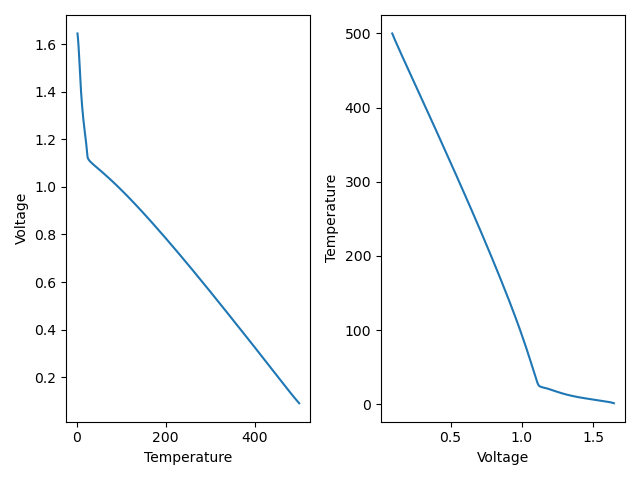

In [5]:
data = np.transpose( np.loadtxt('lakeshore.txt') )
print(data.shape)
print((data[0,0],data[0,-1]))
print((data[1,0],data[1,-1]))
print((data[2,0],data[2,-1]))

plt.figure()
plt.subplot(1,2,1); plt.ylabel('Voltage'); plt.xlabel('Temperature')
plt.plot(data[0] , data[1])

data = np.flip(data , axis=1)
plt.subplot(1,2,2); plt.ylabel('Temperature'); plt.xlabel('Voltage')
plt.plot(data[1],data[0])

plt.tight_layout()

In [6]:
# These taken directly from class. Since we have a function that dies off at high voltage, I figured a rational function 
# interpolation is best suited to deal with it, as well as deal with the lack of smoothness in the data.
# Turns out I was wrong in some way since the fit was all over the place

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

C:\Users\wilia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


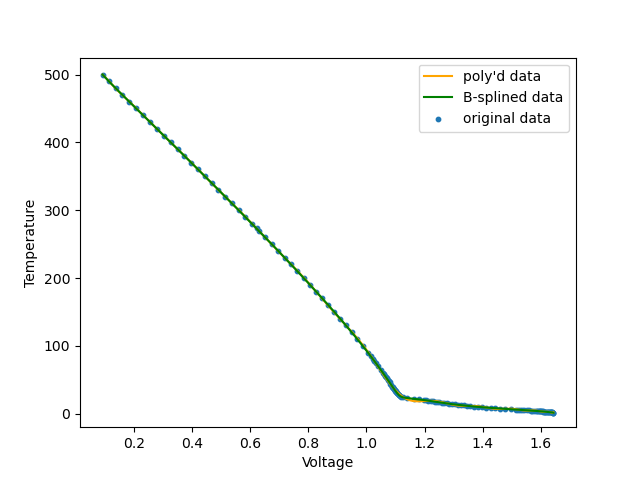

In [7]:
volt = data[1]; temp = data[0]
#n = int(len(volt)/2)
#m = int(len(volt)/2)
#if len(volt)%2 == 0:  m += 1
#else:                 m += 2
#n=30; m=115    
#print(len(volt))
#print((n,m))

volt_long = np.linspace(volt[0],volt[-1],len(volt)*4 , endpoint=True)

#p,q = rat_fit( volt , temp , n,m )
#interp_temp = rat_eval(p,q,volt_long)

poly_pars = np.polyfit(volt,temp , 50)
poly_temp = np.polyval(poly_pars, volt_long)

spln=interpolate.splrep(volt,temp)
spline_temp=interpolate.splev(volt_long,spln)

plt.figure(); plt.ylabel('Temperature'); plt.xlabel('Voltage')
plt.scatter(volt,temp , label='original data' , s=10)
#plt.plot(volt_long,interp_temp , label="rat data")
plt.plot(volt_long,poly_temp , label="poly'd data" , color='orange')
plt.plot(volt_long,spline_temp , label="B-splined data" , color='green')
plt.ylim(-20,525)
plt.legend()

## To estimate errors on the temperature, we can use the residuals of interpolations between even and odd point-fitting, as discussed in the slack channel for this assignment

C:\Users\wilia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\wilia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


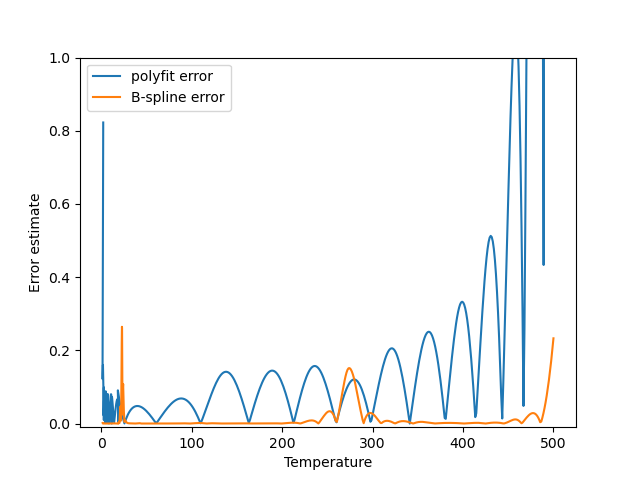

In [8]:
volt_long = np.linspace(volt[0],volt[-1],len(volt)*4 , endpoint=True)

poly_pars_even = np.polyfit(volt[1::2],temp[1::2] , 50)
poly_temp_even = np.polyval(poly_pars_even, volt_long)
poly_pars_odd = np.polyfit(volt[::2],temp[::2] , 50)
poly_temp_odd = np.polyval(poly_pars_odd, volt_long)


spln_even=interpolate.splrep(volt[1::2],temp[1::2])
spline_temp_even=interpolate.splev(volt_long,spln_even)
spln_odd=interpolate.splrep(volt[::2],temp[::2])
spline_temp_odd=interpolate.splev(volt_long,spln_odd)

plt.figure(); plt.ylabel('Error estimate'); plt.xlabel('Temperature')
plt.plot(poly_temp , np.abs(poly_temp_even - poly_temp_odd) , label='polyfit error')
plt.plot(spline_temp , np.abs(spline_temp_even - spline_temp_odd) , label='B-spline error')
plt.ylim(-0.01,1);  plt.legend()

# 3

## cos(x)

C:\Users\wilia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


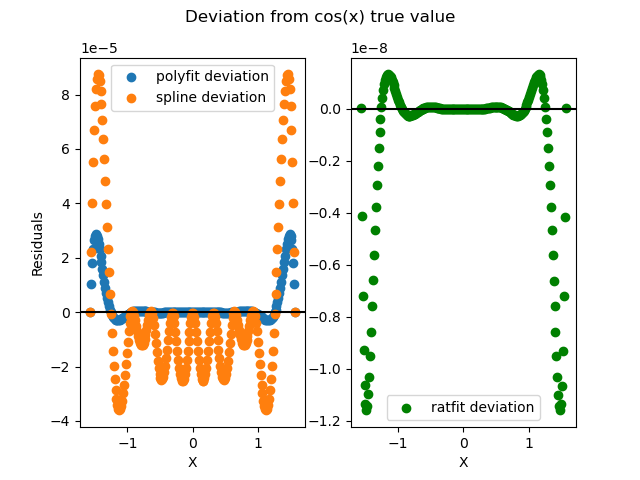

Average error for polyfit is  7.77811345754314e-06
Average error for spline is  3.136098605831141e-05
Average error for ratfit is  3.1788472214393857e-09


In [9]:
x = np.linspace(-np.pi/2 , np.pi/2 , 11 , endpoint=True)
xx = np.linspace(-np.pi/2 , np.pi/2 , len(x)*20 , endpoint=True)
y = np.cos(x)
yy = np.cos(xx)

n=5; m=7

poly_p = np.polyfit(x,y,n+m)
poly_y = np.polyval(poly_p,xx)

spln=interpolate.splrep(x,y)
spline_y=interpolate.splev(xx,spln)

p,q = rat_fit(x,y,n,m)
rat_y = rat_eval(p,q,xx)

plt.figure();  plt.suptitle('Deviation from cos(x) true value')
plt.subplot(1,2,1); plt.xlabel('X'); plt.ylabel('Residuals')
plt.scatter(xx,poly_y-yy , label='polyfit deviation')
plt.scatter(xx,spline_y-yy , label='spline deviation')
plt.axhline(0,c='black')
plt.legend()
plt.subplot(1,2,2); plt.xlabel('X')
plt.scatter(xx,rat_y-yy , c='g' , label='ratfit deviation')
plt.axhline(0,c='black');
plt.legend()

print('Average error for polyfit is ', np.std(poly_y-yy))
print('Average error for spline is ', np.std(spline_y-yy))
print('Average error for ratfit is ', np.std(rat_y-yy))

## Lorentzian

**When using a rational function interpolation for the Lorentzian, we should expect it to agree very well, if not to machine precision, with the actual function value. This is because the Lorentzian 1/(1+x^2) is a rational function with the numerator being an order 0 polynomial and the denominator being an order 2 polynomial, and should therefore synergize nicely with a rational function interpolation.**

In [10]:
def Lorez(x):
    return 1/(1+x**2)

C:\Users\wilia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


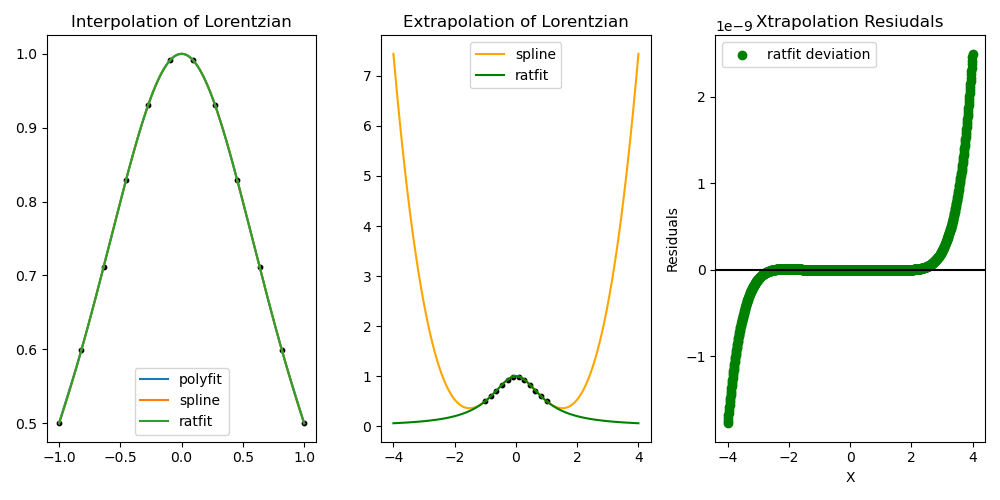

<IPython.core.display.Javascript object>


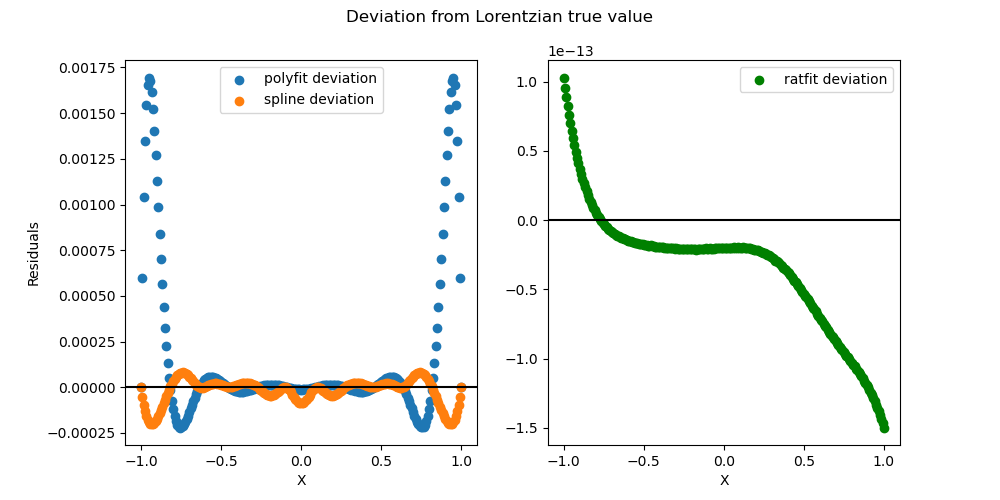

Average error for polyfit is  0.00045116025038113047
Average error for spline is  6.601428865006406e-05
Average error for ratfit is  4.514495863122455e-14


In [11]:
x = np.linspace(-1 , 1 , 12 , endpoint=True)
xx = np.linspace(-1 , 1 , len(x)*20 , endpoint=True)
y = Lorez(x)
yy = Lorez(xx)

# n is chosen to be the smallest possible since a lorentzian is essentially a rational function
n=1; m=12

poly_p = np.polyfit(x,y,n+m)
poly_y = np.polyval(poly_p,xx)

spln=interpolate.splrep(x,y)
spline_y=interpolate.splev(xx,spln)

p,q = rat_fit(x,y,n,m)
rat_y = rat_eval(p,q,xx)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.title('Interpolation of Lorentzian')
plt.scatter(x,y,s=10,c='black')
plt.plot(xx,poly_y , label='polyfit')
plt.plot(xx,spline_y , label='spline')
plt.plot(xx,rat_y , label='ratfit')
plt.legend()

# Used for extrapolation purposes
xxx = np.linspace(-4 , 4 , len(xx)*4 , endpoint=True);  yyy = Lorez(xxx)
poly_yy = np.polyval(poly_p,xxx);  spline_yy=interpolate.splev(xxx,spln);  rat_yy = rat_eval(p,q,xxx)

plt.subplot(1,3,2); plt.title('Extrapolation of Lorentzian')
plt.scatter(x,y,s=10,c='black')
#plt.plot(xxx,poly_yy , label='polyfit')
plt.plot(xxx,spline_yy , label='spline' , c='orange')
plt.plot(xxx,rat_yy , label='ratfit' , c='green')
plt.legend()

plt.subplot(1,3,3)
plt.title('Xtrapolation Resiudals'); plt.xlabel('X'); plt.ylabel('Residuals')
plt.axhline(0,c='black')
plt.scatter(xxx,rat_yy-yyy , c='g' , label='ratfit deviation')
plt.legend()

plt.tight_layout()


plt.figure(figsize=(10,5));  plt.suptitle('Deviation from Lorentzian true value')
plt.subplot(1,2,1); plt.xlabel('X'); plt.ylabel('Residuals')
plt.scatter(xx,poly_y-yy , label='polyfit deviation')
plt.scatter(xx,spline_y-yy , label='spline deviation')
plt.axhline(0,c='black')
plt.legend()
plt.subplot(1,2,2); plt.xlabel('X')
plt.scatter(xx,rat_y-yy , c='g' , label='ratfit deviation')
plt.axhline(0,c='black');
plt.legend()


print('Average error for polyfit is ', np.std(poly_y-yy))
print('Average error for spline is ', np.std(spline_y-yy))
print('Average error for ratfit is ', np.std(rat_y-yy))

## **Rational fitting of Lorentzian with higher order polynomial**

<IPython.core.display.Javascript object>


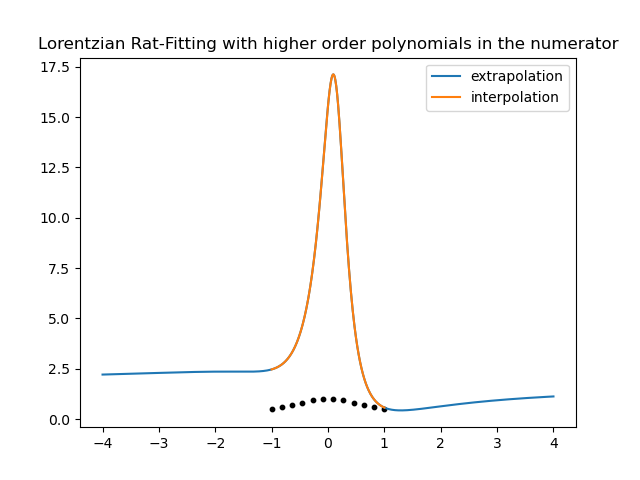

Average error for ratfit is  4.912098488168033


In [12]:
nn=5; mm=8

pp,qq = rat_fit(x,y,nn,mm)
rat_y_worse = rat_eval(pp,qq,xx)

# Used for extrapolation purposes
rat_yy_worse = rat_eval(pp,qq,xxx)

plt.figure()
plt.title('Lorentzian Rat-Fitting with higher order polynomials in the numerator')
plt.scatter(x,y,s=10,c='black')
plt.plot(xxx,rat_yy_worse , label='extrapolation')
plt.plot(xx,rat_y_worse , label='interpolation')
plt.legend()

print('Average error for ratfit is ', np.std(rat_y_worse-yy))

## Switching to np.linalg.pinv()

In [13]:
def rat_fit_pinv(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

<IPython.core.display.Javascript object>


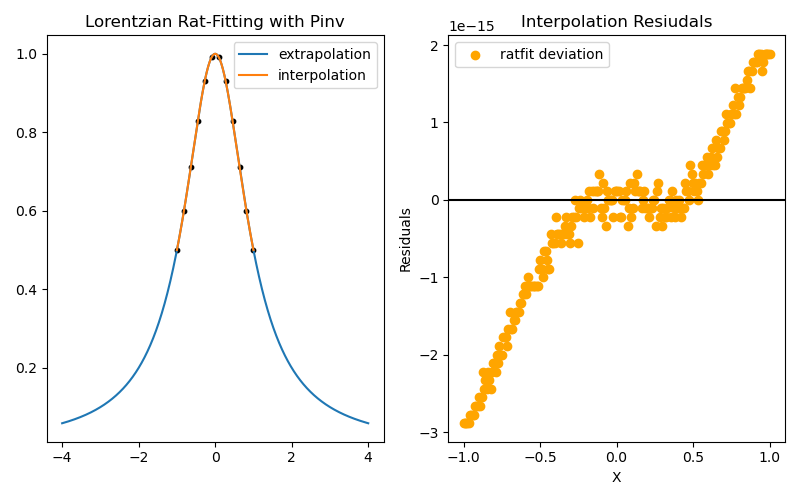

Average error for ratfit is  1.1758190438125238e-15
p coefficients for high order, normal inverse are  [ 15.55999845  -2.          -4.         -12.          14.        ]
p coefficients for high order, p-inverse are  [ 1.00000000e+00  0.00000000e+00 -3.75000000e-01  3.55271368e-15
  1.25000000e-01]
q coefficients for high order, normal inverse are  [-2.00000000e+00  9.00000000e+00  4.00000000e+00  8.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.42108547e-14]
q coefficients for high order, p-inverse are  [ 0.00000000e+00  6.25000000e-01  0.00000000e+00 -2.50000000e-01
 -7.10542736e-15  1.25000000e-01  7.10542736e-15]


In [14]:
ppp,qqq = rat_fit_pinv(x,y,nn,mm)
rat_y_pinv = rat_eval(ppp,qqq,xx)

# Used for extrapolation purposes
rat_yy_pinv = rat_eval(ppp,qqq,xxx)

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Lorentzian Rat-Fitting with Pinv')
plt.scatter(x,y,s=10,c='black')
plt.plot(xxx,rat_yy_pinv , label='extrapolation')
plt.plot(xx,rat_y_pinv , label='interpolation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Interpolation Resiudals'); plt.xlabel('X'); plt.ylabel('Residuals')
plt.axhline(0,c='black')
plt.scatter(xx,rat_y_pinv-yy , c='orange' , label='ratfit deviation')
plt.legend()

plt.tight_layout()

print('Average error for ratfit is ', np.std(rat_y_pinv-yy))
print('p coefficients for high order, normal inverse are ',pp)
print('p coefficients for high order, p-inverse are ', ppp)
print('q coefficients for high order, normal inverse are ',qq)
print('q coefficients for high order, p-inverse are ', qqq)

**Using np.linalg.pinv() has the effect of heavily reducing the value of the p and q coefficients so that inaccuracies in the p and q polynomials are not magnified**

# 4

In [15]:
def big_flashy_electro_function(theta, pars):
    R , z = pars
    return (z-R*np.cos(theta))*np.sin(theta) / (R**2 + z**2 - 2*R*z*np.cos(theta))**(3/2)

In [16]:
# Taken from class #2
def simple_integrate(fun,pars,a,b,tol, total_eval):
    x=np.linspace(a,b,5)
    dx=(b-a)/(5-1)
    y=fun(x,pars)
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    #print([a,b,f1,f2])
    total_eval += 1
    if (myerr<tol) or total_eval > 10:
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate(fun,pars,a,mid,tol/2.0 , total_eval)
        f_right,err_right,neval_right=simple_integrate(fun,pars,mid,b,tol/2.0 , total_eval)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval

1.2299374574364919e-08


<IPython.core.display.Javascript object>


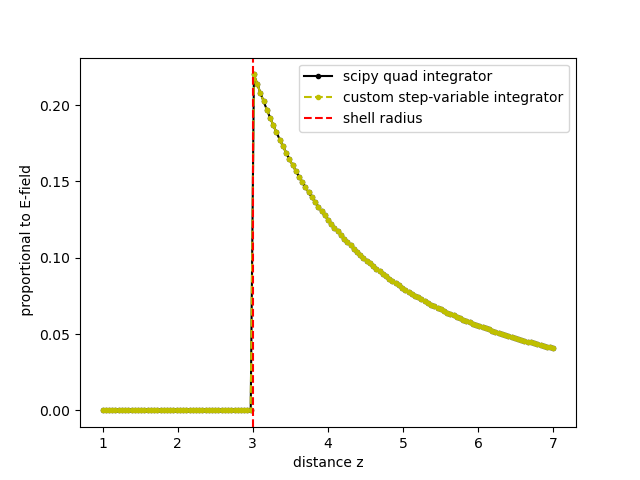

In [17]:
R = 3
z = np.linspace(1,7,141,endpoint=True)
E_custom = np.zeros(len(z))
E_scipy = np.zeros(len(z))

for i in range(len(z)):
    
    f,err,neval = simple_integrate( big_flashy_electro_function , (R,z[i]) , 0,np.pi , 1e-5 , 0)
    ff = integrate.quad( big_flashy_electro_function , 0,np.pi , args=((R,z[i]),) )
    if z[i]==1:
        print(f)
    E_custom[i] = f
    E_scipy[i] = ff[0]
    
plt.figure()
plt.plot(z,E_scipy , label='scipy quad integrator' , c='black' , marker='.')
plt.plot(z,E_custom , label='custom step-variable integrator' , linestyle='--' , c='y' , marker='.')
plt.axvline(R,c='r' , label='shell radius' , linestyle='--')
plt.ylabel(' proportional to E-field');  plt.xlabel('distance z');  plt.legend()

**Since in the regime z > R the E-field goes to infinity, it is expected that for z~R the integral we calculate has high error which will only get worse as we make the dx between points close to z=R finer. Therefore a dreaded singularity manifests itself. Our custom integrator cannot resolve the point and it is categorized as NaN.**

**The scipy quadrature function takes care of this singularity and seems to simply connect (linearly?) the points that flank a NaN result.**